# Capgemini project

### by Margherita Maraschini

In [92]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

import import_ipynb

from pca import *
from prepare_data import *
from plot_figures import *
from NNpythorch import *
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [93]:
#load data
df = pd.read_excel(r'C:\Users\margh\OneDrive\Documenti\GIT\Marketing_Analytics\data.xlsx')

### Assess

In [16]:
#df = pd.read_table("bank-additional-full.csv", delimiter ="; ")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [94]:
def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(df.info())

In [18]:
basic_info(df)

This dataset has  21  columns and  41188  rows.
This dataset has  12  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000

In [22]:
df_copy = pd.get_dummies(df)

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  int64  
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [58]:
df_yes = df[df['y']=='yes']

Add normalization over total number in each category

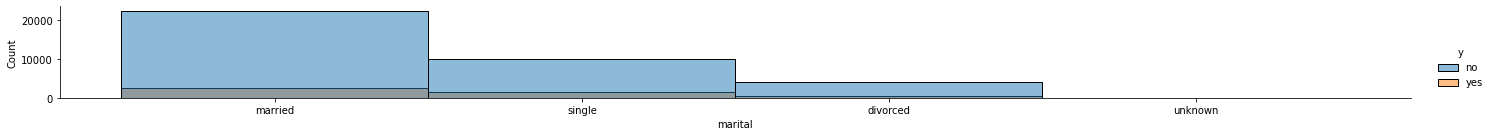

In [74]:

import seaborn as sns
ax=sns.displot(df, x= 'marital', hue ='y', common_norm=True, kind="hist", height=2, aspect=10)

<AxesSubplot:>

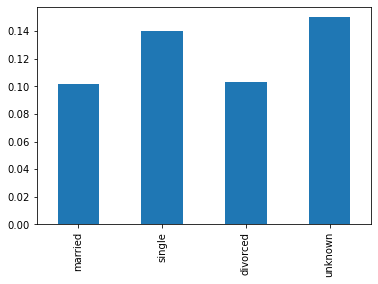

In [82]:

df_plot = df_yes['marital'].value_counts()/ df['marital'].value_counts()
df_plot.plot(kind='bar')

<AxesSubplot:>

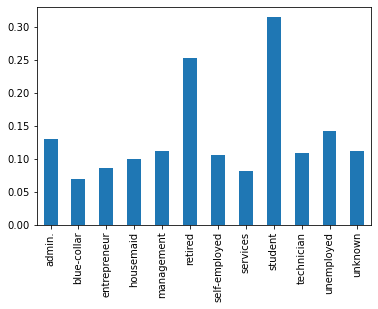

In [83]:
df_plot = df_yes['job'].value_counts()/ df['job'].value_counts()
df_plot.plot(kind='bar')

<AxesSubplot:>

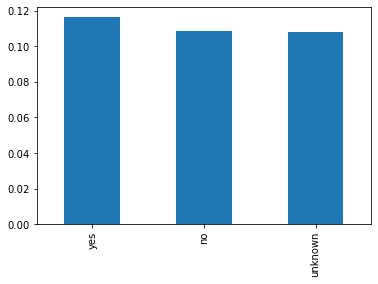

In [84]:
df_plot = df_yes['housing'].value_counts()/ df['housing'].value_counts()
df_plot.plot(kind='bar')

<AxesSubplot:>

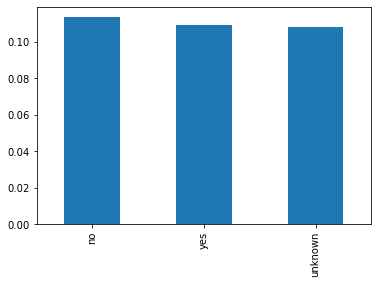

In [85]:
df_plot = df_yes['loan'].value_counts()/ df['loan'].value_counts()
df_plot.plot(kind='bar')

<AxesSubplot:>

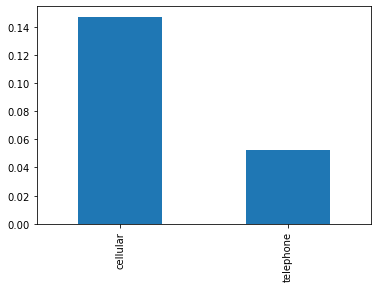

In [86]:
df_plot = df_yes['contact'].value_counts()/ df['contact'].value_counts()
df_plot.plot(kind='bar')

<AxesSubplot:>

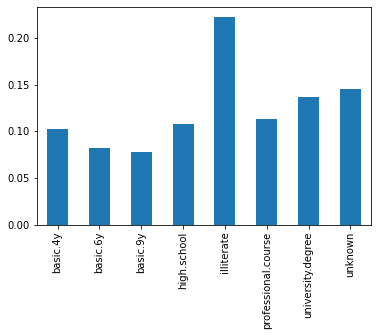

In [87]:
df_plot = df_yes['education'].value_counts()/ df['education'].value_counts()
df_plot.plot(kind='bar')

<AxesSubplot:>

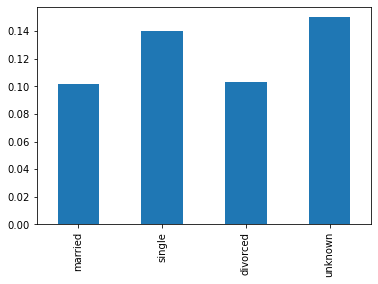

In [88]:
df_plot = df_yes['marital'].value_counts()/ df['marital'].value_counts()
df_plot.plot(kind='bar')

<AxesSubplot:>

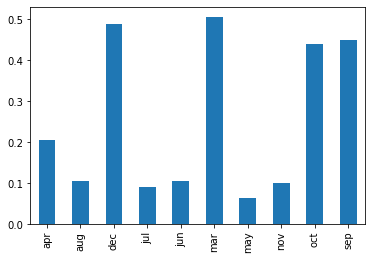

In [89]:
df_plot = df_yes['month'].value_counts()/ df['month'].value_counts()
df_plot.plot(kind='bar')

<AxesSubplot:>

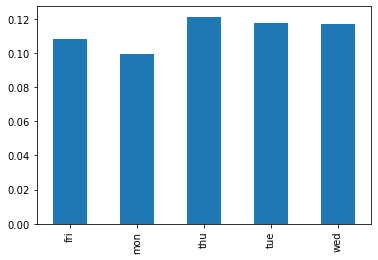

In [90]:
df_plot = df_yes['day_of_week'].value_counts()/ df['day_of_week'].value_counts()
df_plot.plot(kind='bar')

In [91]:

df_copy=df_copy.drop(columns=['y_no'])  # Features
df_copy.rename(columns={'y_yes':'y'}, inplace=True)
df_copy.head()

KeyError: "['y_no'] not found in axis"

### Add outliers check

### See the correlation between variables

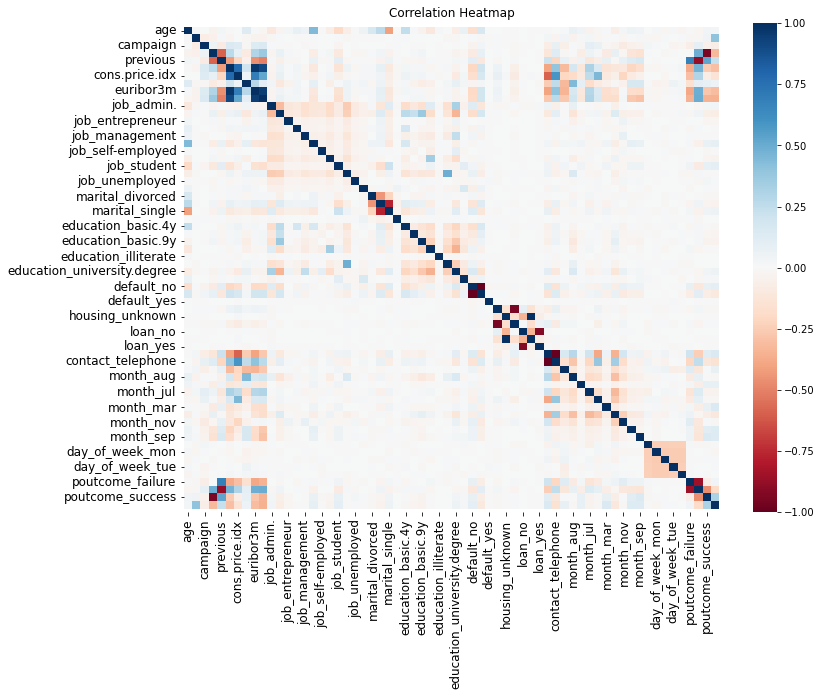

In [ ]:


# create heatmap
plt.figure(figsize = (12, 9))
s = sb.heatmap(df_copy.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

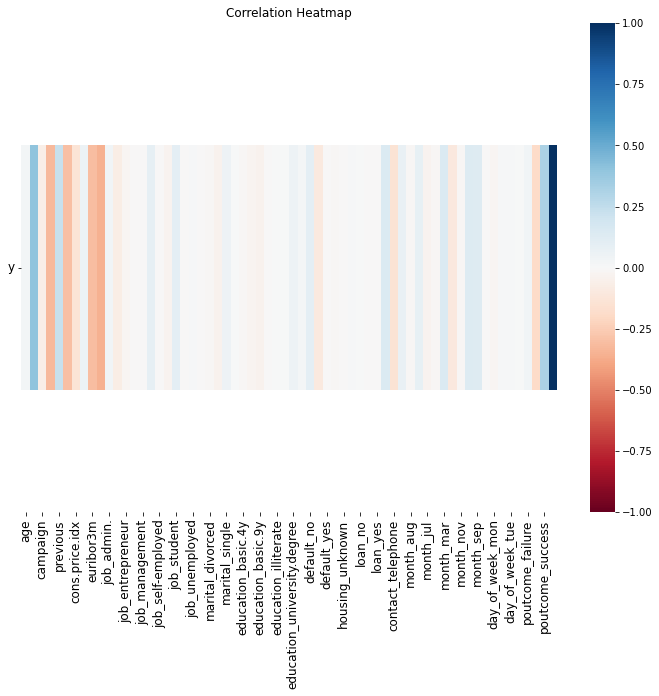

In [ ]:

# create heatmap
plt.figure(figsize = (12, 9))
s = sb.heatmap(df_copy.corr()[-1:],  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

In [95]:

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators = 200, max_depth =6, min_samples_split =2, class_weight="balanced",random_state=0)

### Add validation and tuning

In [98]:
# Import train_test_split function
from sklearn.model_selection import train_test_split



# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_copy.iloc[:,:-1], df_copy.iloc[:,-1:], test_size=0.3) 
# 70% training and 30% test

classifier.fit(X_train, np.ravel(y_train))
y_pred=classifier.predict(X_test)

from sklearn import metrics



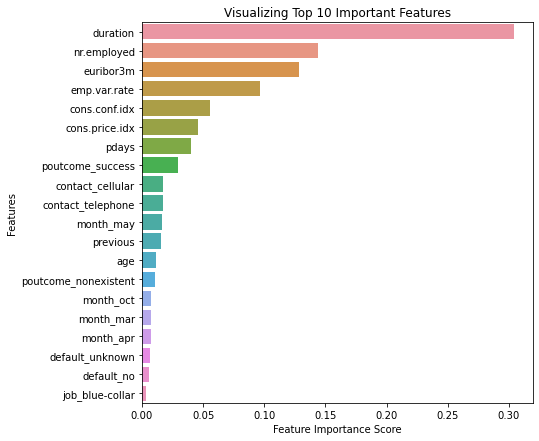

In [99]:


feature_imp = pd.Series(classifier.feature_importances_, 
        index = list(X_test.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:20]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:20], y=feature_imp.index[:20])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()